In [228]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Пусть $X_1, \ldots, X_n \sim N(a, \sigma^2)$
Критерий Стьюдента для проверки гипотезы $H_0 : \theta = \theta_0$ vs $H_1 : \theta \neq \theta_0$:
$$S = \left\{X : \sqrt{n - 1} \left|\frac{\overline{X} - \theta_0}{s}\right| > t_{1 - \frac{\alpha}{2}}\right\},$$
где $s = \sqrt{\frac{\sum_{i=1}^n \left(X_i - \overline{X}\right)^2}{n}}$, а $t_{1 - \frac{\alpha}{2}}$ - квантиль распределения Стьюдента.


В нашем случае $\theta_0 = 0, \alpha = 0.05$. Функция мощности $\beta(Q_{\theta}, S) = Q_{\theta}(X \in S),$ где $Q_{\theta} \in \mathbf{P}$. Построим данную функцию на $\theta = [-10, 10]$, то есть создадим равномерную сетку на данном отрезке и для каждого узла этой сетки сгенерируем $samples = 100$ выборок с распределением $N(\theta, 1)$  и посчитаем количество выборок, которые попали в $S$, таким образом получим эмпирическое распределение функции мощности. Проделаем данную процедуру для разных размеров выборки и нарисуем графики функций мощности.

In [229]:
thetas = np.linspace(-10, 10, 101)

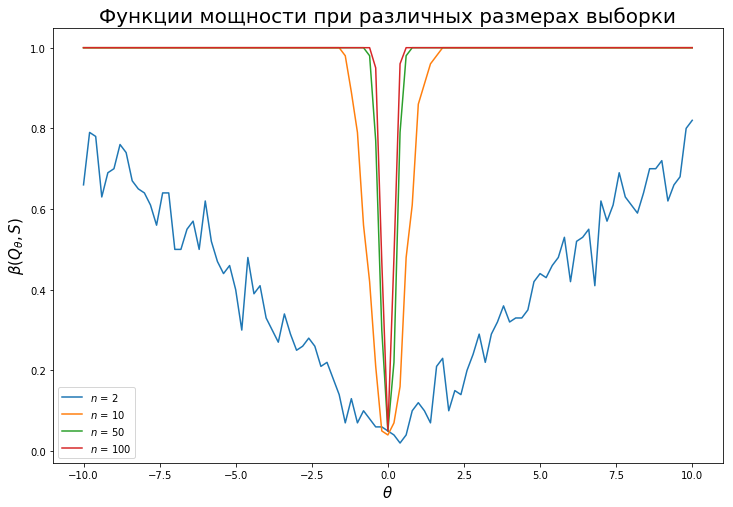

In [230]:
samples = 100
plt.figure(figsize=(12, 8))
for n in [2, 10, 50, 100]:
    probability = []
    t = sts.distributions.t.ppf(0.975, n - 1)
    for theta in thetas:
        norm_rv = sts.norm(loc=theta, scale=1)
        sample = norm_rv.rvs(size=(samples, n))
        
        s = np.array([(np.sum((sample[i] - np.mean(sample[i])) ** 2) \
                       / n) ** 0.5 for i in range(samples)])
        
        probability.append(np.sum([np.abs(np.sqrt(n - 1) * \
                                          np.mean(sample[i]) / s[i]) > t 
                            for i in range(samples)]) / samples)
    plt.plot(thetas, probability, label=r"$n$ = {}".format(n))
plt.xlabel(r"$\theta$", fontsize=15)
plt.ylabel(r"$\beta(Q_{\theta}, S)$", fontsize=15)
plt.title("Функции мощности при различных размерах выборки", fontsize=20)
plt.legend();

Как можно заметить из графика, при увеличении размера выборки для $\theta \neq \theta_0$ значение функции мощности стремится к единице, так как данный критерий состоятельный, а при $\theta = 0$ функция мощности равна $0.05$, так как критерий точный и имеет уровень значимости $\alpha=0.05$.

Найдем такой минимальный $n$, что при $|\theta_0 - \theta_1| = 1$ при проверке гипотезы $H_0 : \theta = \theta_0$ vs $H_1 : \theta = \theta_1$ критерием Стьюдента уровня значимости $0.05$ вероятность ошибки второго рода станет меньше вероятности ошибки первого рода. Для того, чтобы посчитать это возьмем ту же сетку и для каждого узла $\theta_0$ найдем $\theta_1 = \theta_0 + 1$ и сгенерируем по $samples = 100$ выборок для каждого $n \in [10, 25]$ из распределения $N(\theta_0, 1)$. Тогда ошибкой первого рода называется ошибка, когда мы отвергаем $H_0$, если она верна, то есть выборка $X \in S_{\theta_0}$, а ошибкой второго рода называется ошибка, когда мы принимаем $H_1$, если она не верна. То есть мы строим критерий Стьюдента для $\theta_1$ и смотрим, когда наша выборка $X \notin S_{\theta_1}$, то есть мы приняли $H_1$, хотя она и не верна, так как наша выборка из нормального распределения с параметром $\theta_0$.

Таким образом мы для каждого $n$ считаем по сотне сгенерированных выборок вероятности ошибок первого и второго рода и находим такое минимальное $n$, когда вероятность ошибки второго рода станет меньше вероятности ошибки первого рода. И так для каждого $\theta_0$ из нашей сетки.

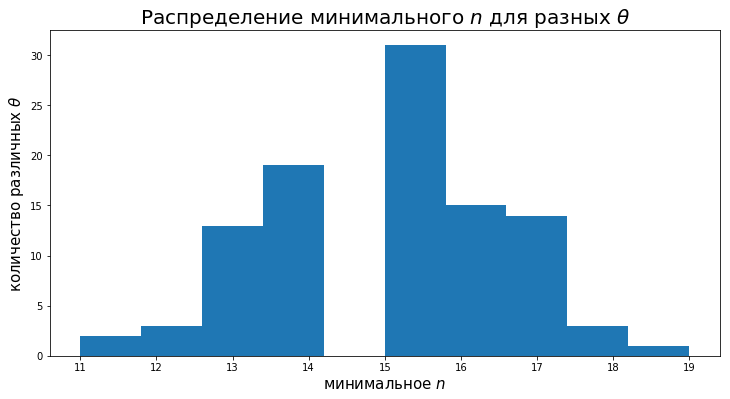

In [231]:
samples = 100
min_n = []
for theta in thetas:
    theta2 = theta + 1
    
    for n in range(10, 25):
        norm_rv = sts.norm(loc=theta, scale=1)
        sample = norm_rv.rvs(size=(samples, n))
        t = sts.distributions.t.ppf(0.975, n - 1)
        s = np.array([(np.sum((sample[i] - np.mean(sample[i])) ** 2) / n) ** 0.5 
                      for i in range(samples)])
        
        first_error = np.sum([np.abs(np.sqrt(n - 1) * \
                                     np.mean(sample[i] - theta) / s[i]) > t 
                              for i in range(samples)]) / samples
        second_error = 1 - np.sum([np.abs(np.sqrt(n - 1) * \
                                          np.mean(sample[i] - theta2) / s[i]) > t 
                                   for i in range(samples)]) / samples
        if first_error > second_error:
            min_n.append(n)
            break

plt.figure(figsize=(12, 6))    
plt.hist(min_n)
plt.xlabel(r"минимальное $n$", fontsize=15)
plt.ylabel(r"количество различных $\theta$", fontsize=15)
plt.title(r"Распределение минимального $n$ для разных $\theta$", fontsize=20);

Таким образом для любого $\theta$ минимальный размер выборки, при котором ошибка второго рода становится меньше ошибки первого рода, равен примерно 18-19.

Вывод: мы убедились в том, что критерий Стьюдента является состоятельными критерием, так как функция мощности стремится к 1 для любого распределения, не равного истинному. Также данный критерий является точным и имеет уровень значимости $\alpha$. Также мы убедились, что даже при небольших размерах выборки (около 18-19) вероятность ошибки второго рода (то есть принятия не верной гипотезы) начинает становится меньше вероятности ошибки первого рода (отвержения верной гипотезы), если разность между истинным и предпологаемым параметром $\theta$ из $N(\theta, 1)$ равна 1, а так как в нашем критерии ошибка первого рода не превосходит $0.05$, то с вероятностью большей, чем $0.95$ мы сможем отвергнуть неверную гипотезу, что является очень неплохим результатом.